In [1]:
import datajoint as dj

In [2]:
#dj.config['database.host'] = 'mesoscale-activity.datajoint.io'

In [3]:

#import getpass
#dj.config['database.user'] = 'boazmohar'
#dj.config['database.password'] = getpass.getpass()

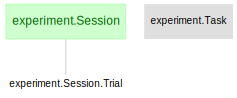

In [9]:
import experiment
dj.ERD(experiment)

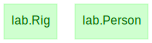

In [8]:
import lab
dj.ERD(lab)

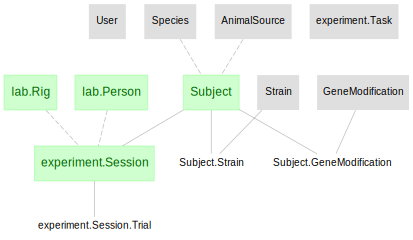

In [15]:
import datajoint as dj
import animal
from animal import *
%matplotlib inline


dj.ERD(animal) + dj.ERD(lab) + dj.ERD(experiment)

In [5]:
s = Subject()
s.insert1((394215, 'mus musculus', 70, '2017-02-05', '2017-07-14', 'M', 'jax'))
s.insert1((394220, 'mus musculus', 71, '2017-02-05', '2017-07-14', 'F', 'jax'))
s.insert1((394219, 'mus musculus', 72, '2017-02-05', '2017-07-26', 'F', 'jax'))
s.insert1((397353, 'mus musculus', 73, '2017-06-06', '2017-08-24', 'M', 'jax'))
s.insert1((397354, 'mus musculus', 74, '2017-06-06', '2017-08-24', 'M', 'jax'))
s.insert1((397357, 'mus musculus', 75, '2017-06-06', '2017-09-17', 'F', 'jax'))
s.insert1((388614, 'mus musculus', 76, '2017-04-15', '2017-09-29', 'M', 'jax'))
s

subject_id institution animal ID,species,wr_number water restriction number,date_of_birth,date_of_surgery,sex,animal_source
388614,mus musculus,76,2017-04-15,2017-09-29,M,jax
394215,mus musculus,70,2017-02-05,2017-07-14,M,jax
394219,mus musculus,72,2017-02-05,2017-07-26,F,jax
394220,mus musculus,71,2017-02-05,2017-07-14,F,jax
397353,mus musculus,73,2017-06-06,2017-08-24,M,jax
397354,mus musculus,74,2017-06-06,2017-08-24,M,jax
397357,mus musculus,75,2017-06-06,2017-09-17,F,jax


In [6]:
strains = Subject.Strain()

strains.insert1((394215,'wt'))
strains.insert1((394220,'wt'))
strains.insert1((394219,'wt'))
strains.insert1((397353,'wt'))
strains.insert1((397354,'wt'))
strains.insert1((397357,'wt'))
strains.insert1((388614,'Chrna2 OE25'))
strains

subject_id institution animal ID,strain mouse strain
388614,Chrna2 OE25
394215,wt
394219,wt
394220,wt
397353,wt
397354,wt
397357,wt


In [7]:
#animal.schema.drop()